In [28]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [29]:
df = pd.read_csv('df_tratado.csv', sep=',')
df.head()

,Unnamed: 0,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,dia,mes,ano,grave
0,2,1032898.0,2007-08-13,Segunda,14:25:00,MG,40,585.5,ITABIRITO,Outras,...,0,1,2,0,1,1,13,8,2007,0
1,3,1051130.0,2007-02-12,Segunda,02:10:00,MA,135,11.0,SAO LUIS,Animais na Pista,...,2,1,0,0,3,1,12,2,2007,1
2,4,1066824.0,2007-11-20,terça,05:30:00,CE,222,30.8,CAUCAIA,Defeito mecânico em veículo,...,1,0,0,0,1,1,20,11,2007,0
3,5,1069918.0,2007-12-16,Domingo,17:40:00,MA,230,14.0,BARAO DE GRAJAU,Outras,...,0,1,0,0,1,1,16,12,2007,0
4,6,1070971.0,2007-03-05,Segunda,08:10:00,PR,277,584.4,CASCAVEL,Outras,...,0,0,2,0,0,2,5,3,2007,0


In [30]:
features = ['dia_semana','fase_dia','condicao_metereologica','tipo_pista','veiculos']
X = df[features]
y = df['grave']

In [31]:
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

C:\Users\adria\AppData\Local\Temp\ipykernel_12496\1733159600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\adria\AppData\Local\Temp\ipykernel_12496\1733159600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\adria\AppData\Local\Temp\ipykernel_12496\1733159600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [33]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [34]:
#Treinar modelo com pesos balanceados
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [35]:
y_pred = clf.predict(X_test)

In [36]:
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)

# 6. Impressão das métricas
print(f"Acurácia:  {acc:.4f}")
print(f"Precisão:  {prec:.4f}")
print(f"Revocação: {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")

Acurácia:  0.6118
Precisão:  0.0700
Revocação: 0.6794
F1-Score:  0.1269



Matriz de Confusão:


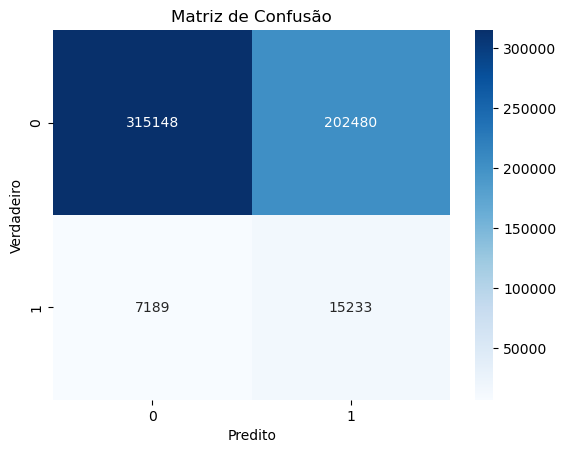

In [37]:
print("\nMatriz de Confusão:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()